**Group Members**

1.ปาณะวัจน์ อุดมทอง

2.พีรพัทธ ตั้งไพบูลย์

3.สมสกุล ทรัพย์ประเสริฐ

# **Load Dependencies**

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266 kB 4.2 MB/s 
     |████████████████████████████████| 167 kB 46.0 MB/s 
     |████████████████████████████████| 248 kB 47.6 MB/s 
     |████████████████████████████████| 2.0 MB 49.0 MB/s 
     |████████████████████████████████| 271 kB 49.9 MB/s 
     |████████████████████████████████| 1.7 MB 46.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.6 MB 122 kB/s 
     |████████████████████████████████| 1.3 MB 57.6 MB/s 
     |████████████████████████████████| 6.8 MB 51.8 MB/s 
     |████████████████████████████████| 80 kB 8.5 MB/s 
     |████████████████████████████████| 111 kB 55.0 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 3.1 MB 46.0 MB/s 
     |████████████████████████████████| 636 kB 47.0 MB/s 
     |██████████████████

In [ ]:
import pandas as pd
from pycaret.clustering import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from scipy import stats
import numpy as np

# **Load Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SupermarketData.csv')
#Pun's GDrive

In [ ]:
df.head(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200732,20071005,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02
1,200733,20071010,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02
2,200741,20071209,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,LS,E02
3,200731,20070929,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237811,L,LA,Full Shop,Mixed,STORE00001,LS,E02
4,200737,20071110,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,NaN,NaN,NaN,994108300002212,L,MM,Full Shop,Fresh,STORE00001,LS,E02


In [ ]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [ ]:
df.tail(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
956569,200617,2006-06-22,5,12,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994101100088778,M,MM,Top Up,Fresh,STORE00002,LS,W01
956570,200633,2006-10-13,6,20,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994102700099738,L,LA,Top Up,Fresh,STORE00002,LS,W01
956571,200617,2006-06-22,5,18,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000544241,LA,YA,994101100506174,L,LA,Top Up,Fresh,STORE00002,LS,W01
956572,200619,2006-07-06,5,19,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000423155,LA,YF,994101300433650,L,LA,Full Shop,Fresh,STORE00002,LS,W01
956573,200635,2006-10-23,2,21,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994102900104676,L,MM,Top Up,Fresh,STORE00002,LS,W01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956574 entries, 0 to 956573
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SHOP_WEEK                 956574 non-null  int64         
 1   SHOP_DATE                 956574 non-null  datetime64[ns]
 2   SHOP_WEEKDAY              956574 non-null  int64         
 3   SHOP_HOUR                 956574 non-null  int64         
 4   QUANTITY                  956574 non-null  int64         
 5   SPEND                     956574 non-null  float64       
 6   PROD_CODE                 956574 non-null  object        
 7   PROD_CODE_10              956574 non-null  object        
 8   PROD_CODE_20              956574 non-null  object        
 9   PROD_CODE_30              956574 non-null  object        
 10  PROD_CODE_40              956574 non-null  object        
 11  CUST_CODE                 802892 non-null  object        
 12  CU

# **Prepare customer single view**

# Define features

Total visits = COUNT(DISTINCT BASKET ID)

Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)

Total no. of SKUs


# Calculate features

In [ ]:
##prepare customer single view
df_csv = df_groupby = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max'),
                                                                                  Weekday = ('SHOP_WEEKDAY', lambda x: x.value_counts().index[0]),
                                                                                  Hour = ('SHOP_HOUR', lambda x: x.value_counts().index[0]),
                                                                                  TotalQuantity = ('QUANTITY', 'sum'),                                                                                                                                                        
                                                                                  ).reset_index()

In [ ]:
df_csv.head()

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,Weekday,Hour,TotalQuantity
0,CUST0000000181,2.44,1,1,2007-01-06,2007-01-06,7,13,1
1,CUST0000000369,959.33,220,189,2006-04-16,2008-07-05,6,17,923
2,CUST0000000689,328.57,16,116,2007-07-22,2008-06-23,2,21,334
3,CUST0000000998,5.95,3,4,2006-05-04,2006-07-07,1,15,6
4,CUST0000001163,39.74,4,24,2006-10-22,2008-06-22,7,16,34


In [ ]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [ ]:
df_csv['TicketVolume'] = df_csv['TotalQuantity']/df_csv['TotalVisits']

In [ ]:
##find max date in the dataset
max_date = df_csv['LastDate'].max()

In [ ]:
##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

In [ ]:
##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

In [ ]:
df_csv.head(5)

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,Weekday,Hour,TotalQuantity,TicketSize,TicketVolume,total_days,recency
0,CUST0000000181,2.44,1,1,2007-01-06,2007-01-06,7,13,1,2.440000,1.000000,1,547
1,CUST0000000369,959.33,220,189,2006-04-16,2008-07-05,6,17,923,4.360591,4.195455,812,1
2,CUST0000000689,328.57,16,116,2007-07-22,2008-06-23,2,21,334,20.535625,20.875000,338,13
3,CUST0000000998,5.95,3,4,2006-05-04,2006-07-07,1,15,6,1.983333,2.000000,65,730
4,CUST0000001163,39.74,4,24,2006-10-22,2008-06-22,7,16,34,9.935000,8.500000,610,14


# **Cluster customers**

In [ ]:
exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE','FirstDate', 'LastDate'], normalize=True)

,Description,Value
0,session_id,4333
1,Original Data,"(6100, 13)"
2,Missing Values,False
3,Numeric Features,8
4,Categorical Features,2
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(6100, 29)"
9,CPU Jobs,-1


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x7fba5490a4d0>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x7fba549...,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x7fba5490a830>,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x7fba548ea560>,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x7fba548ea320>,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x7fba548ea5f0>,make_scorer(completeness_score),pred,{},True,True,False


# Compare model performance

In [ ]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0446,63.7865,5.8598,0,0,0


In [ ]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
model,,,,,,
sc,0.898400,151.759200,0.069900,0,0,0
ap,0.279000,125.409100,1.288400,0,0,0
kmeans,0.251500,2185.493700,1.262000,0,0,0
hclust,0.237700,1936.405500,1.269700,0,0,0
birch,0.216300,1843.052100,1.305500,0,0,0
kmodes,-0.044600,63.786500,5.859800,0,0,0
dbscan,-0.124700,7.240000,1.303400,0,0,0


# Spectral Clustering Clustering

In [ ]:
sc = create_model('sc')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8984,151.7592,0.0699,0,0,0


In [ ]:
plot_model(sc)

# KMeans Clustering

In [ ]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2515,2185.4937,1.262,0,0,0


In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=4333, tol=0.0001, verbose=0)


In [ ]:
plot_model(kmeans)

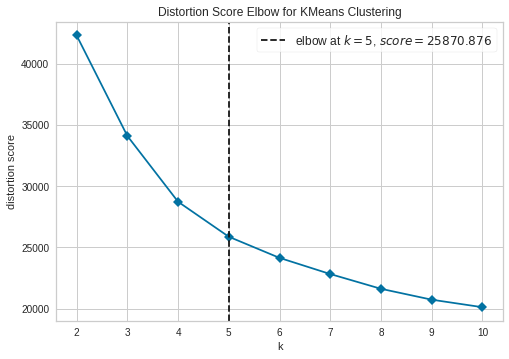

In [ ]:
plot_model(kmeans, plot = 'elbow')

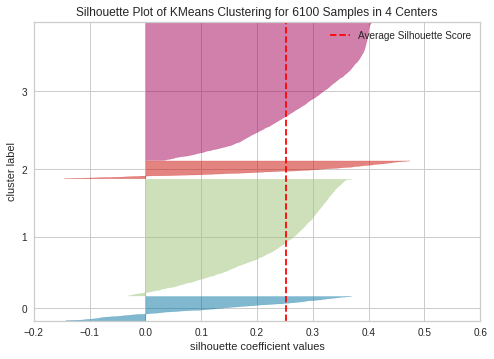

In [ ]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# **Interpret results and plan for actions**

In [ ]:
kmeans_df = assign_model(kmeans)

In [ ]:
kmeans_df.head()

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,Weekday,Hour,TicketSize,total_days,recency,Cluster
0,CUST0000000181,2.44,1,1,2007-01-06,2007-01-06,7,13,2.440000,1,547,Cluster 1
1,CUST0000000369,959.33,220,189,2006-04-16,2008-07-05,6,17,4.360591,812,1,Cluster 3
2,CUST0000000689,328.57,16,116,2007-07-22,2008-06-23,2,21,20.535625,338,13,Cluster 0
3,CUST0000000998,5.95,3,4,2006-05-04,2006-07-07,1,15,1.983333,65,730,Cluster 1
4,CUST0000001163,39.74,4,24,2006-10-22,2008-06-22,7,16,9.935000,610,14,Cluster 0


In [162]:
kmeans_df.groupby(['Cluster']).size()

Cluster
Cluster 0     501
Cluster 1    2402
Cluster 2     366
Cluster 3    2831
dtype: int64

In [165]:
kmeans_df.groupby(['Cluster']).agg(TotalSpend=("TotalSpend", "sum"),
                                   TotalSpendAvg=("TotalSpend", "mean"),
                                   TotalVisits=("TotalVisits", "sum"),
                                   TotalVisitAvg=("TotalVisits", "mean"),
                                   TotalSKUs=("TotalSKUs", "mean"),
                                   WeekdayMode = ("Weekday", lambda x: x.value_counts().index[0]), 
                                   WeekdayAvg = ("Weekday", 'mean'),
                                   HourMode = ("Hour", lambda x: x.value_counts().index[0]), 
                                   HourAvg = ("Hour", 'mean'),
                                   TicketSize=("TicketSize", "sum"),
                                   TicketSizeAvg=("TicketSize", "mean"),
                                   TicketVolume=("TicketVolume", "sum"),
                                   TicketVolumeAvg=("TicketVolume", "mean"),
                                   RecencyAvg=("TicketVolume", "mean")
                                   ).reset_index()

,Cluster,TotalSpend,TotalSpendAvg,TotalVisits,TotalVisitAvg,TotalSKUs,WeekdayMode,WeekdayAvg,HourMode,HourAvg,TicketSize,TicketSizeAvg,TicketVolume,TicketVolumeAvg,RecencyAvg
0,Cluster 0,121428.97,242.373194,3306,6.598802,60.590818,6,4.179641,21,15.381238,20294.287272,40.507559,14649.083694,29.239688,29.239688
1,Cluster 1,429902.73,178.976990,50960,21.215654,51.190258,7,4.158618,21,15.166528,19892.227909,8.281527,15190.880824,6.324263,6.324263
2,Cluster 2,922105.40,2519.413661,63018,172.180328,367.937158,6,4.032787,21,15.625683,6702.157657,18.311906,5418.546713,14.804772,14.804772
3,Cluster 3,27396.59,9.677354,4894,1.728718,5.141999,2,4.007065,15,14.785588,14763.897644,5.215082,11720.460483,4.140043,4.140043


## Interpretation


Cluster 0: Big Spender

*   Key feature: นานๆมาที แต่มาทีแล้วซื้อเยอะ มีลูกค้าอยู่ 501 คน
*   Recommendation: ให้คูปองที่หมดอายุไว จะได้มาถี่ขึ้น เพื่อให้ปรับเป็นกลุ่ม 2

Cluster 1: Potential Shoppers

*   Key feature: ซื้อต่อครั้งไม่เยอะเท่ากลุ่ม 0 แต่มาไม่บ่อยเท่ากลุ่ม 2 แต่ก็มี Spend รวมให้กับร้านเป็นอันดับที่ 2 รองจากกลุ่ม 2
*   Recommendation: สร้าง Engagement เช่นการยิง Ad ใน Facebook เพื่อให้ Upgrade กลายเป็นกลุ่ม 2

Cluster 2: Frequent & VIP Shoppers

*   Key feature: มาซื้อของบ่อยๆ แต่ซื้อไม่เยอะเท่ากลุ่ม 0 มีลูกค้าอยู่เพียง 306 คน แต่เป็นกลุ่มที่ Spend ให้ร้านเยอะที่สุด
*   Recommendation: ให้คูปองส่วนลดที่ต้องซื้อเยอะๆ ถึงจะได้ส่วนลดเพิ่ม จะได้ใช้จ่ายต่อครั้งเพิ่มขึ้น

Cluster 3: The Passer by

*   Key feature: มาไม่บ่อย แล้วก็ซื้อน้อยด้วย
*   Recommendation: ไม่ต้องสนใจ


